In [7]:
import pandas as pd

# Load data
data = pd.read_excel("C:\\Users\\boa\\Downloads\\Maryland_Public_School_Enrollment_Trends.xlsx")

# Inspect data
print(data.head(4))



  Date Created        Grades  Year  Baltimore City  Allegany County  \
0   2021-01-27  Grades Pre-K  2010            4874              506   
1   2021-01-27    Grades K-5  2010           37956             3854   
2   2021-01-27    Grades 6-8  2010           16659             1952   
3   2021-01-27   Grades 9-12  2010           24311             2710   

   Anne Arundel County  Baltimore County  Calvert County  Caroline County  \
0                 1670              3613             385              343   
1                34305             46364            6891             2458   
2                16782             22574            3847             1126   
3                22724             31609            5672             1590   

   Carroll County  ...  Montgomery County  Prince George's County  \
0             271  ...               3503                    6424   
1           11700  ...              64353                   54333   
2            6138  ...              30860          

In [5]:
# check the number of rows and columns
print(data.shape)

(52, 28)


In [9]:
# check for missing value and data types
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Created            52 non-null     datetime64[ns]
 1   Grades                  52 non-null     object        
 2   Year                    52 non-null     int64         
 3   Baltimore City          52 non-null     int64         
 4   Allegany County         52 non-null     int64         
 5   Anne Arundel County     52 non-null     int64         
 6   Baltimore County        52 non-null     int64         
 7   Calvert County          52 non-null     int64         
 8   Caroline County         52 non-null     int64         
 9   Carroll County          52 non-null     int64         
 10  Cecil County            52 non-null     int64         
 11  Charles County          52 non-null     int64         
 12  Dorchester County       52 non-null     int64       

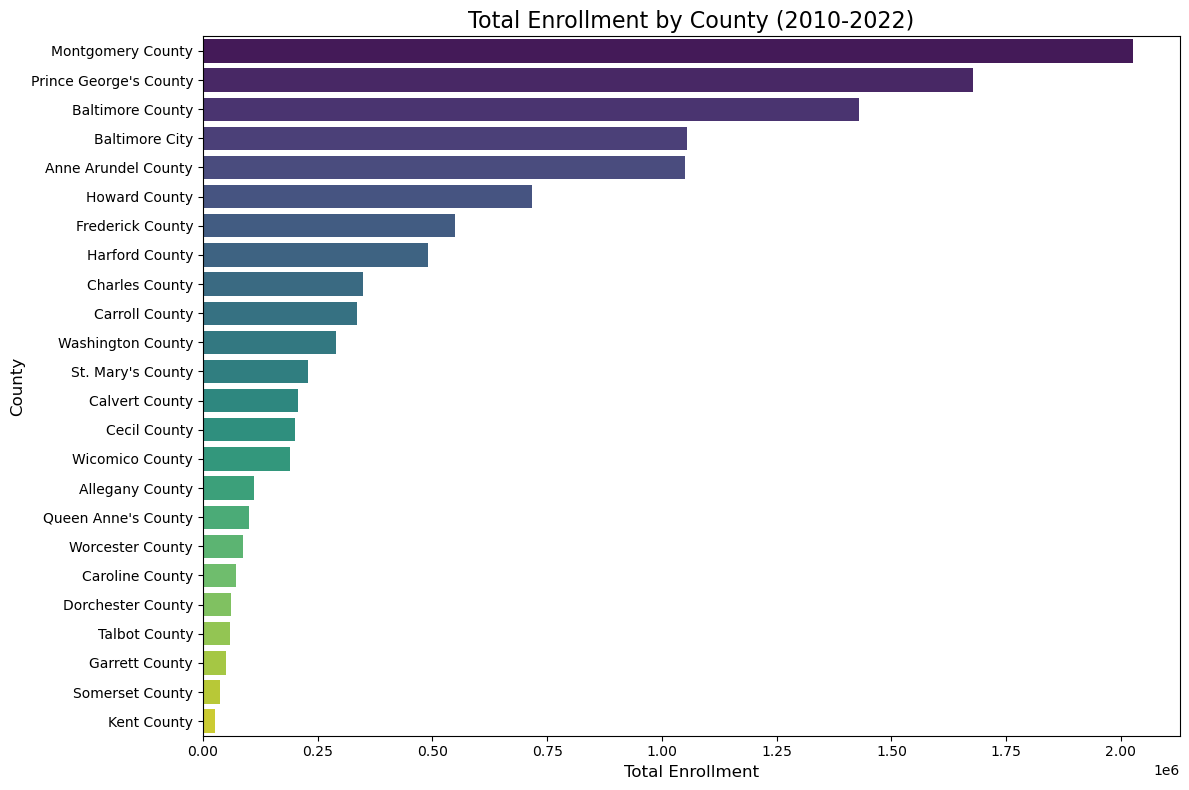

In [11]:
# Total Enrollment Trends between different counties (2010-2022)
# Now you can proceed with the county analysis
columns_to_exclude = ['Date Created', 'Grades', 'Year', 'Maryland']

# Sum the enrollment numbers for each county (by summing across columns)
county_totals = data.drop(columns=columns_to_exclude).sum()

# Sort by total enrollment for better visualization
county_totals_sorted = county_totals.sort_values(ascending=False)

# Visualize as before
import matplotlib.pyplot as plt
import seaborn as sns

# Initializes a new figure with dimensions 12 by 8 inches 
plt.figure(figsize=(12, 8))

# Creates a horizontal bar plot: The total enrollment numbers (on the x-axis) and The names of the counties (on the y-axis) and disable the legend
sns.barplot(x=county_totals_sorted.values, y=county_totals_sorted.index, hue=county_totals_sorted.index, palette="viridis", legend=False)
plt.title('Total Enrollment by County (2010-2022)', fontsize=16)
plt.xlabel('Total Enrollment', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.tight_layout()
plt.show()


In [15]:
# Plot the enrollment trend changes by county from 2010 to 2022
# Exclude non-county columns like 'Date Created' or other meta-data
# Group by 'Year' and sum the enrollment numbers for each county
columns_to_exclude = ['Date Created', 'Grades', 'Maryland']
data_grouped = data.drop(columns=columns_to_exclude).groupby('Year').sum()

# View the first few rows to check
data_grouped.head()


,Baltimore City,Allegany County,Anne Arundel County,Baltimore County,Calvert County,Caroline County,Carroll County,Cecil County,Charles County,Dorchester County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,St. Mary's County,Somerset County,Talbot County,Washington County,Wicomico County,Worcester County
Year,,,,,,,,,,,,,,,,,,,,,
2010,83800,9022,75481,104160,16795,5517,27334,15937,26850,4647,...,2183,144023,126671,7781,17271,2920,4504,22206,14382,6699
2011,84212,8913,76303,105153,16553,5545,27082,15827,26778,4647,...,2162,146459,123833,7761,17449,2882,4547,22240,14520,6643
2012,84747,8929,77770,106927,16323,5585,26687,15634,26644,4718,...,2130,148780,123737,7752,17453,2943,4570,22403,14489,6650
2013,84730,8872,78489,108191,16221,5545,26331,15824,26455,4766,...,2117,151295,125136,7716,17841,2945,4537,22495,14431,6649
2014,84976,8865,79518,109830,16031,5592,25879,15681,26258,4796,...,2106,154435,127576,7724,17887,2938,4630,22327,14545,6654


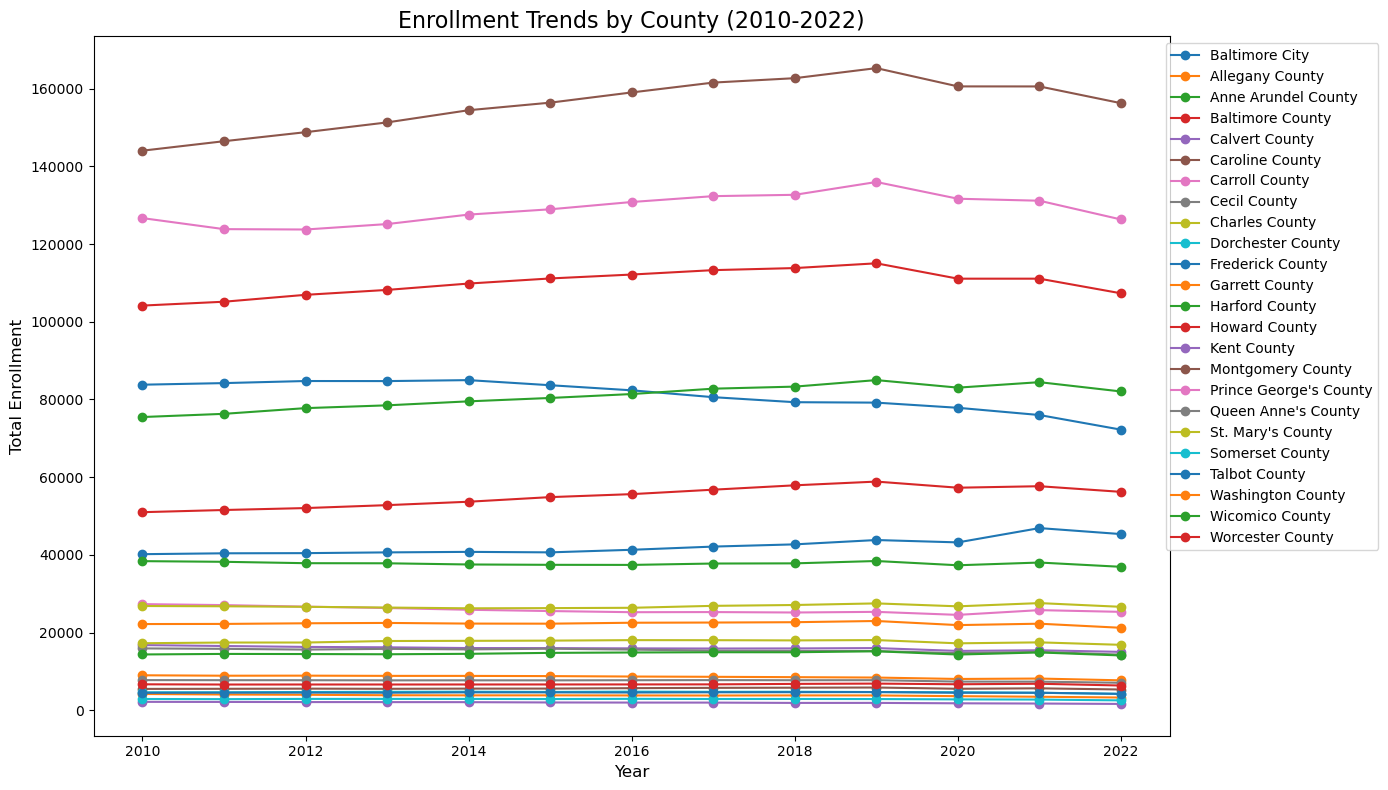

In [17]:
import matplotlib.pyplot as plt

# Set figure size with dimensions 14 by 8 inches
plt.figure(figsize=(14, 8))

# Plot line chart for each county's enrollment trend over time
# Set The years (2010 to 2022) as the x-axis and The enrollment data for each county as the y-axis
for county in data_grouped.columns:
    plt.plot(data_grouped.index, data_grouped[county], marker='o', label=county)

# Add title and labels
plt.title('Enrollment Trends by County (2010-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Enrollment', fontsize=12)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.tight_layout()
plt.show()


In [65]:
# Plot Grades K-5 Enrollment Trends by County (2010-2022)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Exclude specific rows
grades_to_exclude = ['Grades Pre-K', 'Grades 6-8', 'Grades 9-12']
data_filtered = data[~data['Grades'].isin(grades_to_exclude)]

# 2. Exclude specific columns
columns_to_exclude = ['Date Created', 'Grades', 'Maryland']
data_filtered = data_filtered.drop(columns=columns_to_exclude)

# Display the filtered data
print(data_filtered)



    Year  Baltimore City  Allegany County  Anne Arundel County  \
1   2010           37956             3854                34305   
5   2011           38668             3809                34867   
9   2012           39490             3822                36027   
13  2013           40023             3828                36736   
17  2014           40774             3879                37346   
21  2015           40269             3859                37777   
25  2016           39594             3853                38378   
29  2017           38453             3825                39003   
33  2018           37159             3770                38848   
37  2019           36288             3708                39290   
41  2020           35379             3468                37231   
45  2021           33689             3478                37219   
49  2022           28219             2912                31253   

    Baltimore County  Calvert County  Caroline County  Carroll County  \
1 

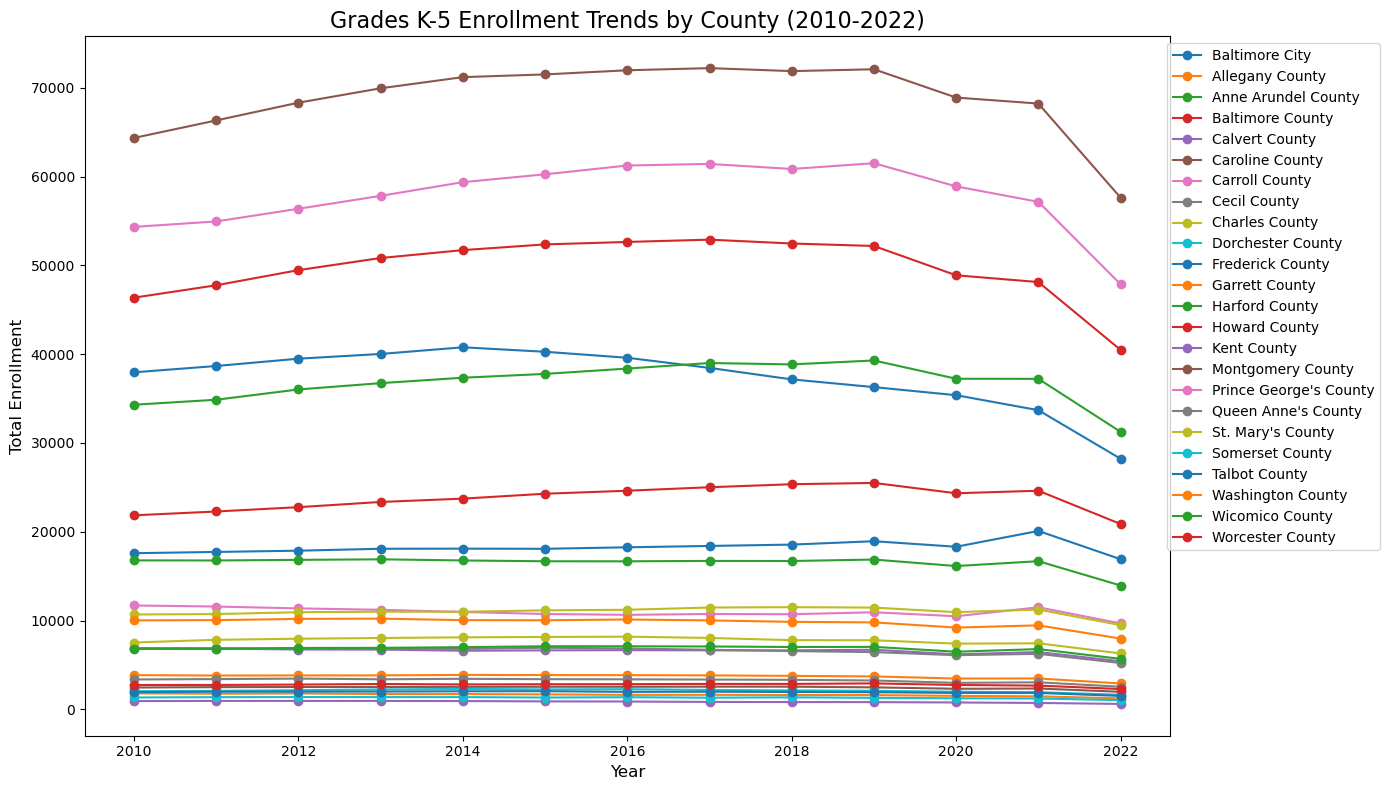

In [69]:
# Set figure size
plt.figure(figsize=(14, 8))

# Plot line chart for each county
for county in data_filtered.columns:
    if county != 'Year':  # Exclude 'Year' column
        plt.plot(data_filtered['Year'], data_filtered[county], marker='o', label=county)

# Add title and labels
plt.title('Grades K-5 Enrollment Trends by County (2010-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Enrollment', fontsize=12)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [71]:
# Plot enrollment trends by grade for Howard County（2010-2022）
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("C:\\Users\\boa\\Downloads\\Maryland_Public_School_Enrollment_Trends.xlsx")

# Extract Year, Grades, and Howard County columns
howard_county_data = data[['Year', 'Grades', 'Howard County']]

print(howard_county_data)

    Year        Grades  Howard County
0   2010  Grades Pre-K           1003
1   2010    Grades K-5          21851
2   2010    Grades 6-8          11484
3   2010   Grades 9-12          16656
4   2011  Grades Pre-K           1066
5   2011    Grades K-5          22281
6   2011    Grades 6-8          11541
7   2011   Grades 9-12          16667
8   2012  Grades Pre-K           1084
9   2012    Grades K-5          22768
10  2012    Grades 6-8          11501
11  2012   Grades 9-12          16700
12  2013  Grades Pre-K           1125
13  2013    Grades K-5          23355
14  2013    Grades 6-8          11909
15  2013   Grades 9-12          16417
16  2014  Grades Pre-K           1174
17  2014    Grades K-5          23730
18  2014    Grades 6-8          12296
19  2014   Grades 9-12          16485
20  2015  Grades Pre-K           1236
21  2015    Grades K-5          24283
22  2015    Grades 6-8          12730
23  2015   Grades 9-12          16621
24  2016  Grades Pre-K           1290
25  2016    

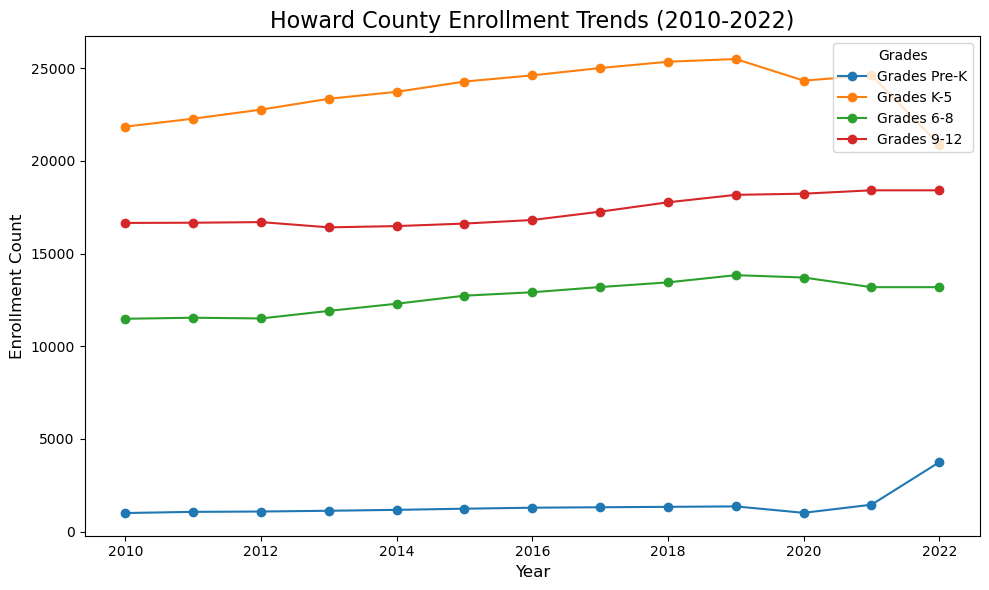

In [75]:
# Plot enrollment trends by grade for Howard County
plt.figure(figsize=(10, 6))

# Loop through each grade and plot its corresponding data
for grade in howard_county_data['Grades'].unique():
    grade_data = howard_county_data[howard_county_data['Grades'] == grade]
    plt.plot(grade_data['Year'], grade_data['Howard County'], marker='o', label=grade)

# Add title and labels to the plot
plt.title('Howard County Enrollment Trends (2010-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Enrollment Count', fontsize=12)

# Add a legend
plt.legend(title='Grades', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()
